# Alien Colony Resource Optimization on Mars
## Project Overview
In this project, you will analyze the resource consumption of an alien colony on Mars. Your goal is to build a model to predict future resource consumption and provide optimization recommendations.
You'll use historical consumption data, Martian weather data, and galactic event data to understand how these factors affect the colony's needs.


In [83]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
alien_consumption = pd.read_csv('data/alien_consumption.csv')
mars_weather = pd.read_csv('data/mars_weather.csv')
galactic_events = pd.read_csv('data/galactic_events.csv')

# Display the first few rows of each dataset
display(alien_consumption.head())
display(mars_weather.head())
display(galactic_events.head())


,date,resource,quantity,temperature,solar_radiation,event_id
0,2045-01-01,power,28782.698171,50.000000,0.000000,E001
1,2045-01-01,water,13769.444294,50.000000,0.000000,E001
2,2045-01-01,rare_minerals,9701.438285,50.000000,0.000000,E001
3,2045-01-02,power,7808.267245,-75.354959,8.037724,NaN
4,2045-01-02,water,5242.828141,-75.354959,8.037724,NaN


,date,avg_temperature_celsius,solar_radiation_kwh_m2
0,2045-01-01,50.000000,0.000000
1,2045-01-02,-75.354959,8.037724
2,2045-01-03,-62.947588,5.325258
3,2045-01-04,14.888554,9.828160
4,2045-01-05,0.839735,6.523069


,event_id,date,event_type,intensity
0,E001,2045-01-01,asteroid_flyby,8
1,E002,2045-01-20,solar_flare,7
2,E003,2045-02-08,solar_flare,9
3,E004,2045-02-27,asteroid_flyby,6
4,E005,2045-03-18,asteroid_flyby,7


## Data Exploration
Before building models, explore the datasets:
- Check for missing values.
- Understand the distribution of the resource consumption, temperatures, and galactic events.


In [84]:
# Check for missing values
print('Alien Consumption Missing Values:', alien_consumption.isnull().sum())
print('Mars Weather Missing Values:', mars_weather.isnull().sum())
print('Galactic Events Missing Values:', galactic_events.isnull().sum())


Alien Consumption Missing Values: date                  0
resource              0
quantity              0
temperature           0
solar_radiation       0
event_id           1035
dtype: int64
Mars Weather Missing Values: date                       0
avg_temperature_celsius    0
solar_radiation_kwh_m2     0
dtype: int64
Galactic Events Missing Values: event_id      0
date          0
event_type    0
intensity     0
dtype: int64


## Merging Datasets
To analyze how weather and galactic events impact resource consumption, merge the datasets:
- Merge `alien_consumption` with `mars_weather` on the `date`.
- Consider how to incorporate `galactic_events`, as they happen on fewer days.


In [85]:
# Merge alien consumption with Mars weather
merged_data = pd.merge(alien_consumption, mars_weather, on='date', how='left')

# Merge galactic events (can be more sparse, so use a left join)
merged_data = pd.merge(merged_data, galactic_events, on='date', how='left')

# Display the first few rows of the merged dataset
display(merged_data.head())

,date,resource,quantity,temperature,solar_radiation,event_id_x,avg_temperature_celsius,solar_radiation_kwh_m2,event_id_y,event_type,intensity
0,2045-01-01,power,28782.698171,50.000000,0.000000,E001,50.000000,0.000000,E001,asteroid_flyby,8.0
1,2045-01-01,water,13769.444294,50.000000,0.000000,E001,50.000000,0.000000,E001,asteroid_flyby,8.0
2,2045-01-01,rare_minerals,9701.438285,50.000000,0.000000,E001,50.000000,0.000000,E001,asteroid_flyby,8.0
3,2045-01-02,power,7808.267245,-75.354959,8.037724,NaN,-75.354959,8.037724,NaN,NaN,NaN
4,2045-01-02,water,5242.828141,-75.354959,8.037724,NaN,-75.354959,8.037724,NaN,NaN,NaN


## Correlation Analysis
Analyze correlations between resource consumption, temperature, solar radiation, and galactic events.
- Does resource consumption increase during extreme temperatures?
- How do galactic events impact resource consumption?


,date,resource,quantity,temperature,solar_radiation,event_id,avg_temperature_celsius,solar_radiation_kwh_m2,intensity
0,2045-01-01,power,28782.698171,50.000000,0.000000,E001,50.000000,0.000000,8.0
1,2045-01-01,water,13769.444294,50.000000,0.000000,E001,50.000000,0.000000,8.0
2,2045-01-01,rare_minerals,9701.438285,50.000000,0.000000,E001,50.000000,0.000000,8.0
3,2045-01-02,power,7808.267245,-75.354959,8.037724,NaN,-75.354959,8.037724,NaN
4,2045-01-02,water,5242.828141,-75.354959,8.037724,NaN,-75.354959,8.037724,NaN


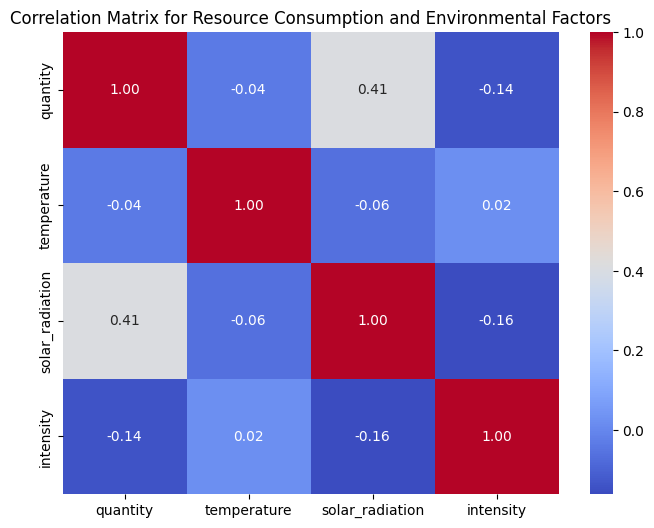

In [86]:
# Correlation analysis
# Merge the datasets
merged_data = pd.merge(alien_consumption, mars_weather, on="date", how="left")
# Merge the alien consumption data with the galactic events data on event_id to add the intensity
merged_data = pd.merge(
    merged_data,
    galactic_events[["event_id", "intensity"]],
    on="event_id",
    how="left",
)

# Now, you can use the merged data for further analysis including the event intensity
display(merged_data.head())

# Select relevant numeric columns for correlation analysis
numeric_cols = ["quantity", "temperature", "solar_radiation", "intensity"]

# Calculate the correlation matrix
correlation_matrix = merged_data[numeric_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Resource Consumption and Environmental Factors")
plt.show()

In [87]:
import pandas as pd

# Load the datasets
mars_weather_df = pd.read_csv("data/mars_weather.csv")
galactic_events_df = pd.read_csv("data/galactic_events.csv")

# Convert date columns to datetime for proper merging
mars_weather_df["date"] = pd.to_datetime(mars_weather_df["date"])
galactic_events_df["date"] = pd.to_datetime(galactic_events_df["date"])

# Merge the two datasets on the 'date' column
merged_data = pd.merge(
    mars_weather_df, galactic_events_df[["date", "intensity"]], on="date", how="left"
)

# Fill missing values in 'intensity' with 0 (since no event on those days)
merged_data["intensity"].fillna(0, inplace=True)

# Calculate the correlation matrix between weather and galactic event intensity
correlation_matrix = merged_data[
    ["avg_temperature_celsius", "solar_radiation_kwh_m2", "intensity"]
].corr()

# Display the correlation matrix
print("Correlation between Mars Weather and Galactic Events:")
print(correlation_matrix)

Correlation between Mars Weather and Galactic Events:
                         avg_temperature_celsius  solar_radiation_kwh_m2  \
avg_temperature_celsius                 1.000000               -0.063873   
solar_radiation_kwh_m2                 -0.063873                1.000000   
intensity                               0.057105               -0.093984   

                         intensity  
avg_temperature_celsius   0.057105  
solar_radiation_kwh_m2   -0.093984  
intensity                 1.000000  


C:\Users\alexa\AppData\Local\Temp\ipykernel_33796\3021263837.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data["intensity"].fillna(0, inplace=True)


## Resource Forecasting
Now that we have explored the data, let's build a simple forecasting model.
- Use historical resource consumption data and external factors (weather, galactic events) to forecast future needs.
- Consider using models like ARIMA, or more advanced methods like Random Forest or XGBoost.


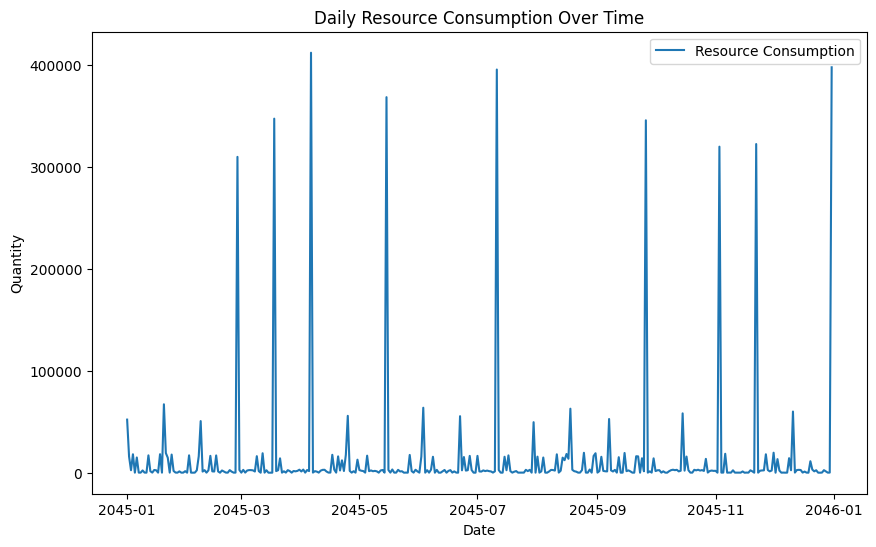

c:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


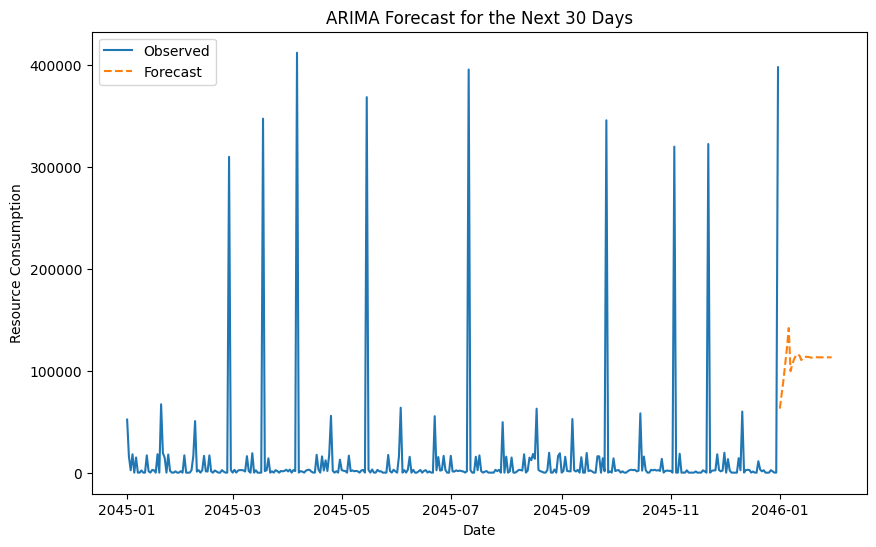

In [91]:
# Example: Time Series Forecasting using ARIMA
from statsmodels.tsa.arima.model import ARIMA
# Aggregate resource consumption by date
consumption_by_date = (
    alien_consumption.groupby("date").agg({"quantity": "sum"}).reset_index()
)

# Convert date to datetime and set it as index
consumption_by_date["date"] = pd.to_datetime(consumption_by_date["date"])
consumption_by_date.set_index("date", inplace=True)

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(consumption_by_date["quantity"], label="Resource Consumption")
plt.title("Daily Resource Consumption Over Time")
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.legend()
plt.show()

# Fit ARIMA model (p,d,q) parameters
model = ARIMA(
    consumption_by_date["quantity"], order=(5, 1, 0)
)  # (5, 1, 0) are ARIMA model parameters
arima_model = model.fit()

# Forecast resource consumption for the next 30 days
forecast = arima_model.forecast(steps=30)

# Create a plot to visualize the forecast
plt.figure(figsize=(10, 6))
plt.plot(consumption_by_date.index, consumption_by_date["quantity"], label="Observed")
plt.plot(
    pd.date_range(start=consumption_by_date.index[-1], periods=31, freq="D")[1:],
    forecast,
    label="Forecast",
    linestyle="--",
)
plt.title("ARIMA Forecast for the Next 30 Days")
plt.xlabel("Date")
plt.ylabel("Resource Consumption")
plt.legend()
plt.show()

## Insights and Recommendations
After building your model, analyze the results:
- What do the forecasts suggest about future resource consumption?
- How should the Mars colony allocate resources to ensure the needs of both humans and aliens are met?
- What strategies can be implemented to handle spikes in consumption caused by galactic events?
